In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


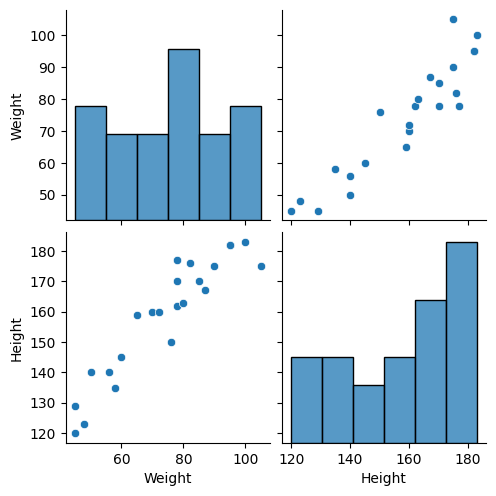

In [4]:
sns.pairplot(data=df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['Weight']]
y = df['Height']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size= 0.25)

In [8]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [9]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [10]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(n_jobs=-1)

In [11]:
LR.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [12]:
print(f'The Slop : {LR.coef_[0]}')
print(f'The Intercept : {LR.intercept_}')
y_pred = LR.predict(x_test)

The Slop : 17.29820570436306
The Intercept : 156.47058823529412


<Axes: ylabel='Height'>

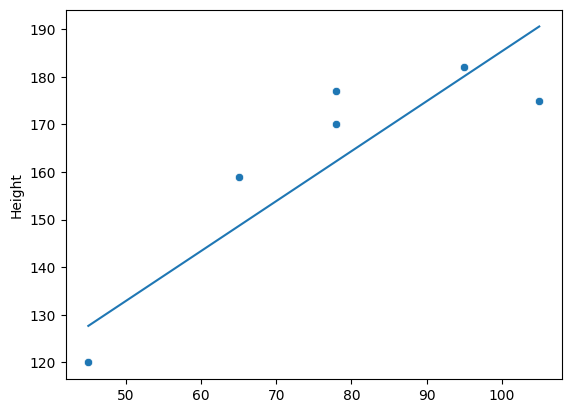

In [13]:
sns.scatterplot(x=scalar.inverse_transform(x_test).flatten(), y=y_test)
sns.lineplot(x = scalar.inverse_transform(x_test).flatten() , y = y_pred)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'The Mean absolute error {mae} and the Mean square error {mse}')

The Mean absolute error 9.66512588679501 and the Mean square error 114.84069295228699


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_pred = y_pred, y_true = y_test)

0.7360826717981276

In [25]:
# OLS

import statsmodels.api as sm

model = sm.OLS(endog = y_train, exog = x_train).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 05 Oct 2025   Prob (F-statistic):                       0.664
Time:                        20:23:48   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.2982     39.138      0.442      0.664     -65.671     100.267
==============================================================================
Omnibus:                        0.135   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.203
Skew:                          -0.166   Prob(JB):                        0.904
Kurtosis:                       2.581   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""